In [1]:
#Import Librarires
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Set working Directory
os.chdir("S:\Aparajita\edwisor\proj1_bike")

In [3]:
#Load csv data
bike_data=pd.read_csv("day.csv")

In [4]:
#viewing top 5 observations
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#Checking the dimension
bike_data.shape

(731, 16)

In [6]:
#Checking the data types
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#expolatory data analysis
bike_data['season']=bike_data['season'].astype('category')
bike_data['mnth']=bike_data['mnth'].astype('category')
bike_data['holiday']=bike_data['holiday'].astype('category')
bike_data['weekday']=bike_data['weekday'].astype('category')
bike_data['workingday']=bike_data['workingday'].astype('category')
bike_data['weathersit']=bike_data['weathersit'].astype('category')
d1=bike_data['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=datetime.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
    bike_data['dteday']=d1
    bike_data['dteday']=bike_data['dteday'].astype('category')
bike_data = bike_data.drop(['instant','casual', 'registered'], axis=1)

In [8]:
#checking data types after perfrming EDA
bike_data.dtypes

dteday        category
season        category
yr               int64
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [9]:
#Missing Value analysis
missing_val=pd.DataFrame(bike_data.isnull().sum())
missing_val=missing_val.reset_index()
missing_val=missing_val.rename(columns={'index':'Variables', 0:'Missing_Values'})
missing_val
#No missing values

,Variables,Missing_Values
0,dteday,0
1,season,0
2,yr,0
3,mnth,0
4,holiday,0
5,weekday,0
6,workingday,0
7,weathersit,0
8,temp,0
9,atemp,0


{'whiskers': [<matplotlib.lines.Line2D at 0x19cf4c01288>,
 'caps': [<matplotlib.lines.Line2D at 0x19cf4c15c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cf4c151c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19cf4c1fe08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cf4c1fec8>],
 'means': []}

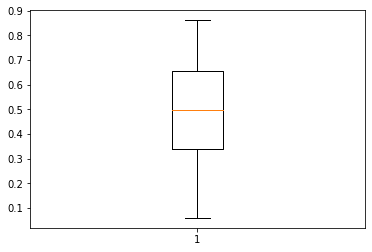

In [10]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(bike_data['temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19cf4c08a08>,
 'caps': [<matplotlib.lines.Line2D at 0x19cf4cc7e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cf4cbffc8>],
 'medians': [<matplotlib.lines.Line2D at 0x19cf4ccee08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cf4ccef08>],
 'means': []}

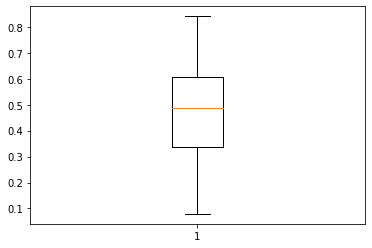

In [11]:
%matplotlib inline
plt.boxplot(bike_data['atemp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19cf4ce0148>,
 'caps': [<matplotlib.lines.Line2D at 0x19cf4d39fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cf4d32d08>],
 'medians': [<matplotlib.lines.Line2D at 0x19cf4d3fac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cf4d3ffc8>],
 'means': []}

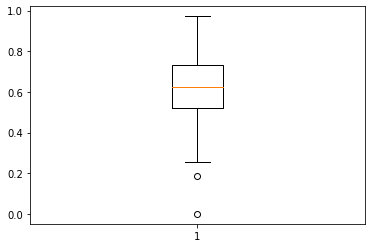

In [12]:
%matplotlib inline
plt.boxplot(bike_data['hum'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19cf4d9efc8>,
 'caps': [<matplotlib.lines.Line2D at 0x19cf4da5fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cf4d9e6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x19cf4daaf48>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cf4daafc8>],
 'means': []}

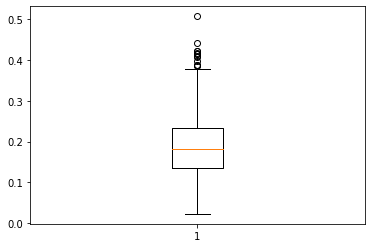

In [13]:
%matplotlib inline
plt.boxplot(bike_data['windspeed'])

In [14]:
#Detecting and deleting outliers
#windspeed and hum has outliers
#saving the column names showing outliers
onames=["hum", "windspeed"]
for i in onames :
    q75,q25=np.percentile(bike_data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    bike_data=bike_data.drop(bike_data[bike_data.loc[:,i]<min].index)
    bike_data=bike_data.drop(bike_data[bike_data.loc[:,i]>max].index)

In [15]:
#Checking the dimensions after Pre-Processing
bike_data.shape

(717, 13)

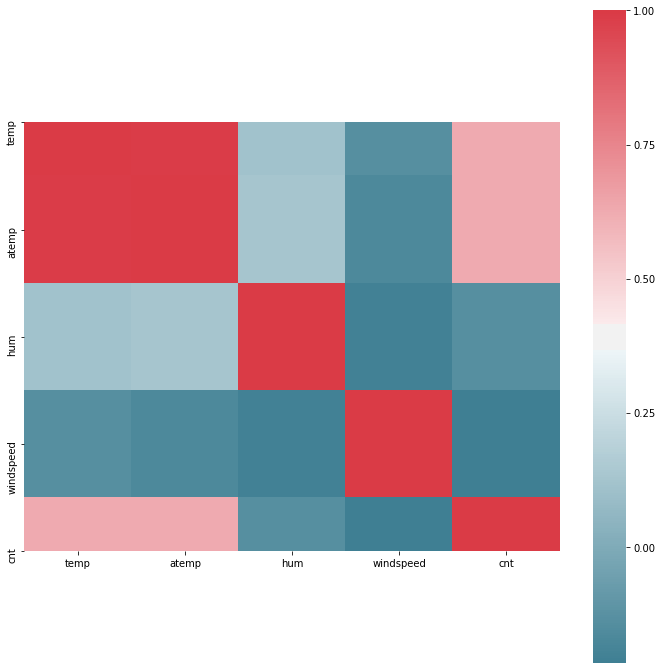

In [16]:
#Feature Selection
#Correlation Analysis
#creating a subset with only continous variables
cont_names = ["temp","atemp","hum","windspeed","weathersit","cnt"]
df_corr=bike_data.loc[:,cont_names]
#correlation plot
f, ax = plt.subplots(figsize=(12, 12))
#generate correlation matrix
corr=df_corr.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [17]:
#Checking the correlation of continous variables
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991738,0.114191,-0.140169,0.625892
atemp,0.991738,1.000000,0.126587,-0.166038,0.629204
hum,0.114191,0.126587,1.000000,-0.204496,-0.136621
windspeed,-0.140169,-0.166038,-0.204496,1.000000,-0.216193
cnt,0.625892,0.629204,-0.136621,-0.216193,1.000000


In [18]:
# dimension reduction
#temp and atemp have high correlation thus droping atemp
bike_data = bike_data.drop(['atemp'], axis =1)

In [19]:
#Checking the dimensions after dimenion reduction
bike_data.shape

(717, 12)

In [20]:
#viewing top 5 observations
bike_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [21]:
#Simple Random Sampling
Sample_Index = np.random.rand(len(bike_data)) < 0.8

train = bike_data[Sample_Index]
test = bike_data[~Sample_Index]

In [22]:
#Decision Tree
DTmodel = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:11], train.iloc[:,11])
DT_predictions = DTmodel.predict(test.iloc[:,0:11]).astype(int)

In [23]:
#Random forest
RFmodel = RandomForestRegressor(n_estimators = 200).fit(train.iloc[:,0:11], train.iloc[:,11])
RF_Predictions = RFmodel.predict(test.iloc[:,0:11]).astype(int)

In [24]:
#Create linear regression data.
onames=["yr", "holiday", "workingday", "temp","hum","windspeed"]
bike_data_temp = pd.DataFrame(bike_data[onames])
##Create dummies for categorical variables
cat_names = ["season", "dteday", "weathersit", "mnth","weekday"]

for i in cat_names:
    temp = pd.get_dummies(bike_data[i], prefix = i)
    bike_data_temp = bike_data_temp.join(temp)
bike_data_temp=bike_data_temp.join(bike_data['cnt'])

In [25]:
#Checking the data for linear regression model
bike_data_temp.head()

,yr,holiday,workingday,temp,hum,windspeed,season_1,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt
0,0,0,0,0.344167,0.805833,0.160446,1,0,0,0,...,0,0,0,0,0,0,0,0,1,985
1,0,0,0,0.363478,0.696087,0.248539,1,0,0,0,...,0,0,1,0,0,0,0,0,0,801
2,0,0,1,0.196364,0.437273,0.248309,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1349
3,0,0,1,0.200000,0.590435,0.160296,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1562
4,0,0,1,0.226957,0.436957,0.186900,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1600


In [26]:
#Test and Train data for multiple Linear Regression
train_lr = bike_data_temp[Sample_Index]
test_lr = bike_data_temp[~Sample_Index]

In [27]:
#Linear Regression Model
LRmodel = sm.OLS(train_lr.iloc[:,63], train_lr.iloc[:,0:63].astype(float)).fit()
LR_predictions = LRmodel.predict(test_lr.iloc[:,0:63]).astype(int)
LRmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     54.72
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          9.48e-184
Time:                        03:29:39   Log-Likelihood:                -4620.5
No. Observations:                 577   AIC:                             9357.
Df Residuals:                     519   BIC:                             9610.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            2045.4080     66.492     30.762      0.000    1914.782    2176.034
holiday        -31.2634    171.933     -0.182      0.856    -369.033     306.506
workingday     693.0126     94.752      7.314      0.000     506.868     879.157
temp          4075.7346    475.475      8.572      0.000    3141.643    5009.827
hum          -1323.4411    364.453     -3.631      0.000   -2039.426    -607.456
windspeed    -3026.4413    496.160     -6.100      0.000   -4001.170   -2051.713
season_1      -239.5745    152.671     -1.569      0.117    -539.505      60.356
season_2       591.1745    157.197      3.761      0.000     282.355     899.994
season_3       507.5773    166.152      3.055      0.002     181.164     833.990
season_4      1266.0194    161.376      7.845      0.000     948.989    1583.050
dteday_01     -250.6249    170.728     -1.468      0.143    -586.028      84.779
dteday_02      -35.9595    179.237     -0.201      0.841    -388.079     316.160
dteday_03      119.5726    169.783      0.704      0.482    -213.973     453.118
dteday_04      247.0624    204.143      1.210      0.227    -153.985     648.110
dteday_05      120.5412    170.477      0.707      0.480    -214.370     455.452
dteday_06      176.8906    170.587      1.037      0.300    -158.236     512.017
dteday_07     -169.1178    179.618     -0.942      0.347    -521.986     183.750
dteday_08      -47.8649    179.461     -0.267      0.790    -400.425     304.695
dteday_09       78.2765    184.139      0.425      0.671    -283.474     440.027
dteday_10      174.1930    189.826      0.918      0.359    -198.730     547.116
dteday_11      390.9761    174.315      2.243      0.025      48.526     733.426
dteday_12      203.8803    196.724      1.036      0.301    -182.593     590.354
dteday_13      107.4824    166.703      0.645      0.519    -220.013     434.978
dteday_14       86.2917    162.184      0.532      0.595    -232.325     404.909
dteday_15      390.1187    184.849      2.110      0.035      26.974     753.263
dteday_16      258.5399    170.132      1.520      0.129     -75.691     592.771
dteday_17      507.9534    175.324      2.897      0.004     163.522     852.385
dteday_18      -61.9129    170.659     -0.363      0.717    -397.180     273.354
dteday_19      252.8796    174.617      1.448      0.148     -90.163     595.922
dteday_20      199.3960    171.070      1.166      0.244    -136.678     535.470
dteday_21      300.2565    161.092      1.864      0.063     -16.216     616.729
dteday_22     -103.8468    176.711     -0.588      0.557    -451.004     243.310
dteday_23      -99.9534    167.064     -0.598      0.550    -428.158     228.252
dteday_24     -152.3052    167.415     -0.910      0.363    -481.200     176.589
dteday_25     -298.1169    191.446     -1.557      0.120    -674.220      77.986
dteda

In [28]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [29]:
#Calculate MAPE for DT
print("MAPE of Decission Tree=",MAPE(test.iloc[:,11], DT_predictions),"%")

#Calculate MAPE for RF
print("MAPE of Random Forest=",MAPE(test.iloc[:,11], RF_Predictions),"%")

#Calculate MAPE for LR
print("MAPE of Multiple Linear Regression=",MAPE(test_lr.iloc[:,63], LR_predictions),"%")


MAPE of Decission Tree= 31.45419152348239 %
MAPE of Random Forest= 16.067339888364515 %
MAPE of Multiple Linear Regression= 20.99165426373055 %


In [30]:
#Random Forest has the least MAPE
#Selecting the RAndom Forest Model and saving its output
result=pd.DataFrame(test.iloc[:,0:11])
result['Pred_Cnt'] = (RF_Predictions)

result.to_csv("RF_op_python.csv",index=False)